In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.6 MB/s eta 

In [ ]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import gradio as gr

In [ ]:

train_path='/content/drive/MyDrive/Disease dataset/Split_smol/train'
valid_path='/content/drive/MyDrive/Disease dataset/Split_smol/val'

In [ ]:
inception=InceptionV3(input_shape=(299,299,3),weights='imagenet',include_top='False')

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
for layer in  inception.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/drive/MyDrive/Disease dataset/Split_smol/train/*')
folders

['/content/drive/MyDrive/Disease dataset/Split_smol/train/Normal',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Nail Fungus',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Squamous cell carcinoma',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Tinea Ringworm Candidiasis',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Melanocytic nevus',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Melanoma',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Vascular lesion',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Hairloss',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Acne',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Atopic Dermatitis',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Benign keratosis',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Dermatofibroma',
 '/content/drive/MyDrive/Disease dataset/Split_smol/train/Actinic keratosis']

In [ ]:
flat=Flatten()(inception.output)


In [ ]:
predictions=Dense(len(folders),activation='softmax')(flat)
model=Model(inputs=inception.input,outputs=predictions)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator (rescale = 1./255,
shear_range= 0.2,
zoom_range= 0.5,
horizontal_flip = True,
rotation_range=30,
width_shift_range=0.1,
height_shift_range=0.1,
channel_shift_range=0.2,
brightness_range=[0.25,0.5])
test_datagen = ImageDataGenerator (rescale = 1./255)


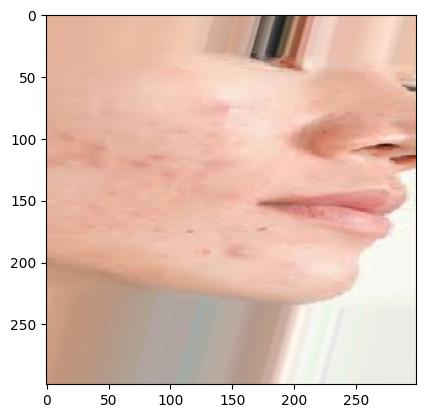

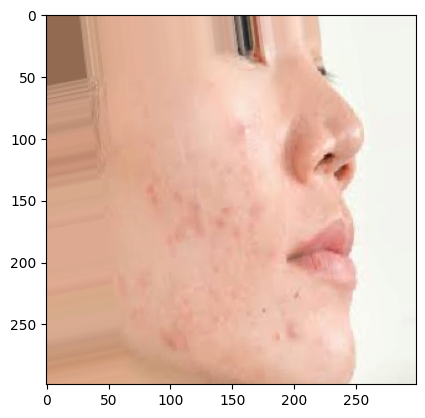

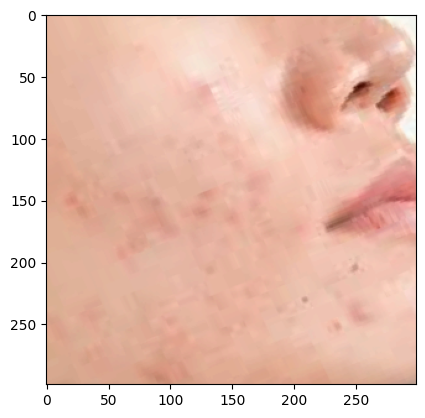

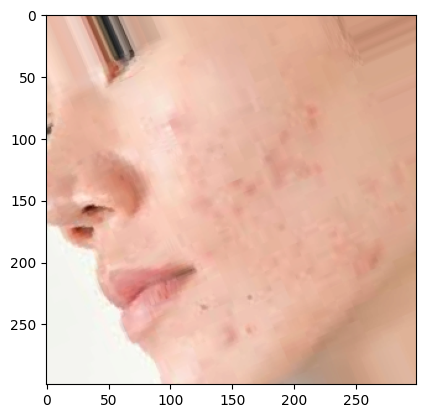

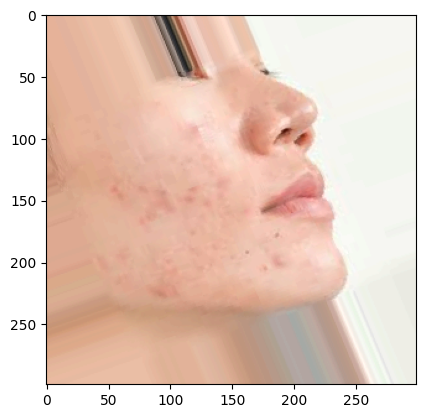

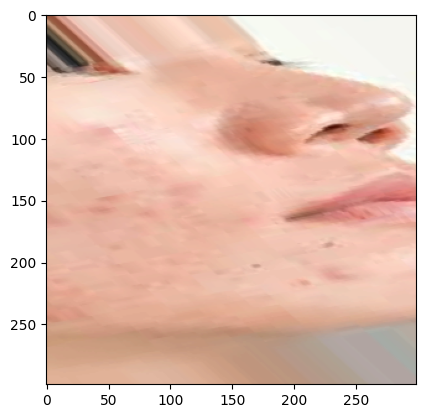

In [ ]:
import matplotlib.pyplot as plt
img_path = '/content/drive/MyDrive/Disease dataset/Split_smol/train/Acne/2 (10).jpeg'
img = image.load_img(img_path, target_size=(299,299))
image_toarray = image.img_to_array(img)
image_toarray = np.expand_dims(image_toarray, axis=0)

# Generate augmented images
i = 0
for batch in train_datagen.flow(image_toarray, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6  == 0:
        break

In [ ]:
training_set=train_datagen.flow_from_directory(train_path,target_size=(299,299),batch_size=16,class_mode='categorical')
validating_set=test_datagen.flow_from_directory(valid_path,target_size=(299,299),batch_size=16,class_mode='categorical')

Found 1163 images belonging to 13 classes.
Found 314 images belonging to 13 classes.


In [ ]:
disease_find=model.fit(training_set,validation_data=validating_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(validating_set))

Epoch 1/20
73/73 [==============================] - 53s 716ms/step - loss: 2.2423 - accuracy: 0.3216 - val_loss: 2.1973 - val_accuracy: 0.3408
Epoch 2/20
73/73 [==============================] - 44s 601ms/step - loss: 2.2397 - accuracy: 0.3044 - val_loss: 2.1851 - val_accuracy: 0.3376
Epoch 3/20
73/73 [==============================] - 45s 611ms/step - loss: 2.2272 - accuracy: 0.3130 - val_loss: 2.1725 - val_accuracy: 0.3471
Epoch 4/20
73/73 [==============================] - 44s 606ms/step - loss: 2.2098 - accuracy: 0.3199 - val_loss: 2.1605 - val_accuracy: 0.3408
Epoch 5/20
73/73 [==============================] - 44s 594ms/step - loss: 2.1926 - accuracy: 0.3293 - val_loss: 2.1474 - val_accuracy: 0.3535
Epoch 6/20
73/73 [==============================] - 44s 599ms/step - loss: 2.1890 - accuracy: 0.3396 - val_loss: 2.1351 - val_accuracy: 0.3567
Epoch 7/20
73/73 [==============================] - 44s 593ms/step - loss: 2.1800 - accuracy: 0.3379 - val_loss: 2.1236 - val_accuracy: 0.3567

In [ ]:
severity_disease_train_path='/content/drive/MyDrive/disease/dataset/Train'
severity_disease_test_path='/content/drive/MyDrive/disease/dataset/Test'

In [ ]:
inception_severity=InceptionV3(input_shape=(299,299,3),weights='imagenet',include_top='False')

In [ ]:
for layer in  inception_severity.layers:
  layer.trainable=False

In [ ]:
severity=glob('/content/drive/MyDrive/disease/dataset/Train/*')
severity

['/content/drive/MyDrive/disease/dataset/Train/Mild',
 '/content/drive/MyDrive/disease/dataset/Train/Severe',
 '/content/drive/MyDrive/disease/dataset/Train/Medium']

In [ ]:
flat1=Flatten()(inception_severity.output)

In [ ]:
severity_predictions=Dense(len(severity),activation='softmax')(flat1)
model_severity=Model(inputs=inception_severity.input,outputs=severity_predictions)

In [ ]:
model_severity.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator (rescale = 1./255,
shear_range= 0.2,
zoom_range= 0.2,
horizontal_flip = True,
rotation_range=30,
width_shift_range=0.1,
height_shift_range=0.1,
channel_shift_range=0.2,
brightness_range=[0.8, 1.2])
test_datagen = ImageDataGenerator (rescale = 1./255)

In [ ]:
training_set_Severity=train_datagen.flow_from_directory(severity_disease_train_path,target_size=(299,299),batch_size=16,class_mode='categorical')
validating_set_Severity=test_datagen.flow_from_directory(severity_disease_test_path,target_size=(299,299),batch_size=16,class_mode='categorical')

Found 615 images belonging to 3 classes.
Found 308 images belonging to 3 classes.


In [ ]:
severity_model=model_severity.fit(training_set_Severity,validation_data=validating_set_Severity,epochs=20,steps_per_epoch=len(training_set_Severity),validation_steps=len(validating_set_Severity))

Epoch 1/20
39/39 [==============================] - 202s 5s/step - loss: 1.0972 - accuracy: 0.3659 - val_loss: 1.0958 - val_accuracy: 0.4156
Epoch 2/20
39/39 [==============================] - 22s 575ms/step - loss: 1.0901 - accuracy: 0.4976 - val_loss: 1.0936 - val_accuracy: 0.4318
Epoch 3/20
39/39 [==============================] - 21s 549ms/step - loss: 1.0839 - accuracy: 0.5333 - val_loss: 1.0919 - val_accuracy: 0.4448
Epoch 4/20
39/39 [==============================] - 22s 569ms/step - loss: 1.0770 - accuracy: 0.5447 - val_loss: 1.0903 - val_accuracy: 0.4416
Epoch 5/20
39/39 [==============================] - 23s 572ms/step - loss: 1.0720 - accuracy: 0.5398 - val_loss: 1.0889 - val_accuracy: 0.4383
Epoch 6/20
39/39 [==============================] - 23s 574ms/step - loss: 1.0687 - accuracy: 0.5691 - val_loss: 1.0872 - val_accuracy: 0.4610
Epoch 7/20
39/39 [==============================] - 23s 583ms/step - loss: 1.0614 - accuracy: 0.5447 - val_loss: 1.0859 - val_accuracy: 0.4513
E

In [ ]:
img=image.load_img('/content/drive/MyDrive/disease/dataset/Test/Medium/Pityriasis-Lichenoides-10.jpg',target_size=(299,299))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.0
disease_labels=['Acne','Actinic keratosis','Atopic Dermatitis','Dermatofibroma','Hairloss','Melanocytic nevus',
              'Melanoma','Nail Fungus','Normal','Squamous cell carcinoma','Tinea Ringworm','Vascular lesion']
severity_labels=['Mild','Medium','Severe']

predictions_disease=model.predict(img)
disease_label_index=np.argmax(predictions_disease)
disease_class=disease_labels[disease_label_index]
prediction_severity=model_severity.predict(img)
severity_index=np.argmax(prediction_severity)
disease_severity=severity_labels[severity_index]
print(disease_severity)
print(disease_class)


1/1 [==============================] - 3s 3s/step
Medium
Squamous cell carcinoma


In [ ]:
def process(input_image):
    try:
        # Convert input image to a NumPy array
        input_image = image.img_to_array(input_image)

        # Expand dimensions to make it compatible with the model
        input_image = np.expand_dims(input_image, axis=0)

        # Scale pixel values to the range [0, 1]
        input_image /= 255.0

        # Make severity prediction using the model
        severity_predict = model_severity.predict(input_image)
        disease_predict=model.predict(input_image)

        # Get the index with the highest predicted severity
        severity_index = np.argmax(severity_predict)
        disease_index=np.argmax(disease_predict)

        # Retrieve the severity label based on the index
        severity_result = severity_labels[severity_index]
        disease_result=disease_labels[disease_index]

        return severity_result,disease_result
    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
iface = gr.Interface(
    fn=process,
    inputs=gr.inputs.Image(type="pil"),  # Gradio's way of specifying image input
    outputs=[ gr.outputs.Label(label="Severity"),  # Label for the first output
        gr.outputs.Label(label="Skin Disease")],
    title="Skin Disease Severity Prediction",
    description="Upload an image of a skin condition to predict its severity and the skin condition."
)

# Launch the Gradio interface
iface.launch(share=True)


<ipython-input-28-b6ec3c3ac254>:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(type="pil"),  # Gradio's way of specifying image input
<ipython-input-28-b6ec3c3ac254>:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(type="pil"),  # Gradio's way of specifying image input
<ipython-input-28-b6ec3c3ac254>:4: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=[ gr.outputs.Label(label="Severity"),  # Label for the first output
<ipython-input-28-b6ec3c3ac254>:4: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  outputs=[ gr.outputs.Label(label="Severity"),  # Label for the first output
<ipython-input-28-b6ec3c3ac254>:5: Grad

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://62f85bfa564e0a8e5d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install opencage

In [ ]:
import requests
api_key = 'f2f6425a67514f128a0806765cff28a2'
def geocode_location(location):
    base_url = 'https://api.opencagedata.com/geocode/v1/json'
    params = {
        'q': location,
        'key': api_key,
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    if 'results' in data and data['results']:
        # Extract latitude and longitude from the first result
        first_result = data['results'][0]
        lat = first_result['geometry']['lat']
        lon = first_result['geometry']['lng']
        return lat, lon
    else:
        return None

In [ ]:
def get_nearest_hospitals(city,country, radius=1000):
    location=city+','+country
    coordinates=geocode_location(location)

    overpass_url = "https://overpass-api.de/api/interpreter"
    query = f"""
    [out:json];
    (
        node["amenity"="hospital"](around:{radius},{coordinates[0]},{coordinates[1]});
        way["amenity"="hospital"](around:{radius},{coordinates[0]},{coordinates[1]});
        relation["amenity"="hospital"](around:{radius},{coordinates[0]},{coordinates[1]});
    );
    out center;
    """
    response_overpass = requests.get(overpass_url, params={'data': query})
    data_location = response_overpass.json()
    result=''
    for item in data_location['elements']:
        if 'tags' in item:
            result = f"Name: {item['tags'].get('name', 'N/A')}\n"

    # Check if 'lat' and 'lon' exist before adding them to the result


    return result




In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3


In [ ]:
interface=gr.Interface(get_nearest_hospitals,inputs=['text','text'],outputs=['text'],title='Nearest Hospitals finder for Severe Conditions',description='Enter your city and location to get nearest hopsitals if condition is Severe')

In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f8beb917725b7b8eac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
